In [113]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter


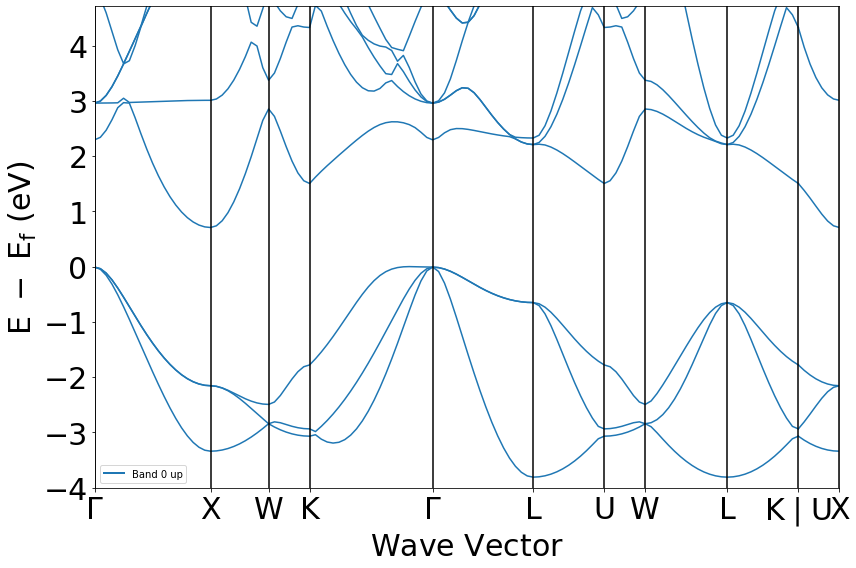

In [114]:
with MPRester('brNMq9mRKCbXNGk2k') as mpr:
    bandstructure = mpr.get_bandstructure_by_material_id('mp-2074')
    plotter = BSPlotter(bandstructure)
    plotter.get_plot()

In [115]:
band_gap = bandstructure.get_band_gap()
print(band_gap)

{'direct': False, 'energy': 0.7073999999999998, 'transition': '(0.071,0.071,0.143)-X'}


In [116]:
Y = plotter.bs_plot_data()
dist = plotter.get_ticks()["distance"]
x = np.linspace(0,dist[-1],100)
ymin = Y['vbm'][0][1]
ymax = Y['cbm'][0][1]
Emin = bandstructure.get_cbm()['energy']
Emax = bandstructure.get_vbm()['energy']

print("Bande de conduction \n")
print("L'énergie du minimum de la bande de conduction vaut Emin = " + str(Emin) + "eV")
print("La position de ce point est : X," + str(ymax))
#les bandes contenant le min de la bande de conduction
print("Bandes contenant le min de la bande de conduction :" ,bandstructure.get_cbm()['band_index'])


print("\nBande de valence \n")


print("L'énergie du minimum de la bande de valence vaut Emax = " + str(Emax) + "eV") 
print("La position de ce point est : X," + str(ymin))
#les bandes contenant le min de la bande de conduction
print("Bandes contenant le min de la bande de valence :" ,bandstructure.get_vbm()['band_index'])

Bande de conduction 

L'énergie du minimum de la bande de conduction vaut Emin = 4.7005eV
La position de ce point est : X,0.7073999999999998
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [7]})

Bande de valence 

L'énergie du minimum de la bande de valence vaut Emax = 3.9931eV
La position de ce point est : X,0.0
Bandes contenant le min de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [6]})


Dispersion 

La pente maximale de la bande de valence est égal à    2.72121321072022 (en vert) .
La pente minimale de la bande de valence est égal à    0.7057619879733482(en mauve).
La pente maximale de la bande de conduction est égal à 4.478737587485207 (en rouge).
La pente minimale de la bande de conduction est égal à 0.10334518964053512 (en noir) .


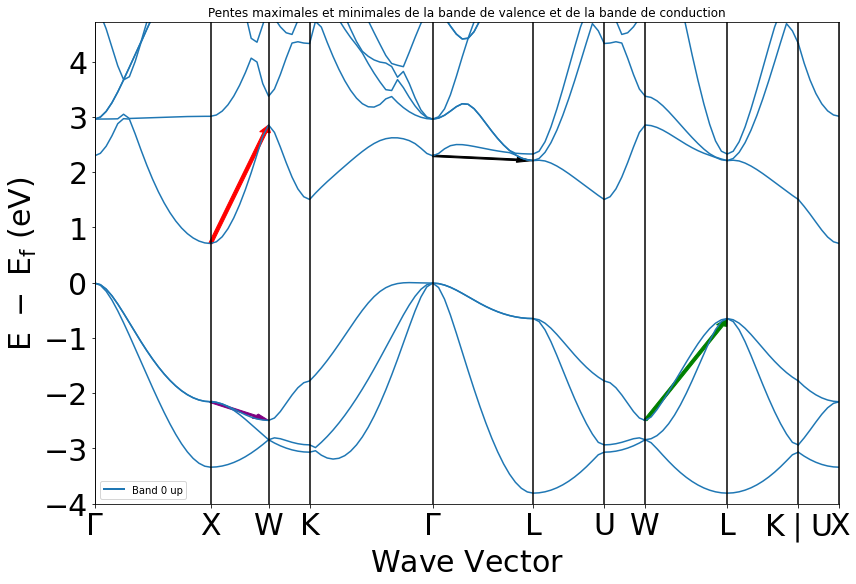

In [117]:
print("Dispersion \n")

# Recherche de la pente 
def calcul_pente(a,b):
    c = abs(a[-1] - a[0]) /( b[-1] - b[0])
    return np.array([a[-1],a[0],b[-1],b[0],c])

def dispersions (d):
    pente = np.zeros((len(Elem.get('distances')),5))
    p_p    = np.zeros(len(Elem.get('distances')))
    for i in range (len(Elem.get('distances'))):
        pente [i] = calcul_pente((Elem.get('energy'))["1"][i][d],Elem.get('distances')[i])
        
    for j in range (len(Elem.get('distances'))):
        p_p [j] = pente[j][4]
    return [pente,p_p]


maxima_valence    = np.argmax(dispersions(6)[1])
minima_valence    = np.argmin(dispersions(6)[1])
maxima_conduction = np.argmax(dispersions(7)[1])
minima_conduction = np.argmin(dispersions(7)[1])


# Recherche des pentes maximales pour la bande de valence et de conduction 
BS.get_plot()
plt.title("Pentes maximales et minimales de la bande de valence et de la bande de conduction")
pente_val_max  = dispersions(6)[0][maxima_valence]
pente_cond_max = dispersions(7)[0][maxima_conduction]

plt.arrow(pente_val_max[3],pente_val_max[1],pente_val_max[2]-pente_val_max[3],pente_val_max[0]-pente_val_max[1],color='green', width = 0.03,length_includes_head = True)
plt.arrow(pente_cond_max[3],pente_cond_max[1],pente_cond_max[2]-pente_cond_max[3],pente_cond_max[0]-pente_cond_max[1],color = 'red',width =0.03, length_includes_head = True)

# Recherche des pentes minimales pour la bande de valence et de conduction 
pente_val_min  = dispersions(6)[0][minima_valence]
pente_cond_min = dispersions(7)[0][minima_conduction]

plt.arrow(pente_val_min[3],pente_val_min[1],pente_val_min[2]-pente_val_min[3],pente_val_min[0]-pente_val_min[1],color='purple', width = 0.03,length_includes_head = True)
plt.arrow(pente_cond_min[3],pente_cond_min[1],pente_cond_min[2]-pente_cond_min[3],pente_cond_min[0]-pente_cond_min[1],color = 'black',width =0.03, length_includes_head = True)

print("La pente maximale de la bande de valence est égal à    "+ str(pente_val_max[4])+ " (en vert) .")
print("La pente minimale de la bande de valence est égal à    "+ str(pente_val_min[4])+ "(en mauve).")
print("La pente maximale de la bande de conduction est égal à "+ str(pente_cond_max[4])+ " (en rouge).")
print("La pente minimale de la bande de conduction est égal à "+ str(pente_cond_min[4])+ " (en noir) .")

In [118]:
A = 10**(-10)
eV = 1.602176563*10**(-19)
h_ = (6.62607015*10**(-34))/(2*np.pi)


masse_effective_valence = (h_**2)/(2*abc_v[0]*(A**2)*eV)
masse_effective_conduction = (h_**2)/(2*abc_c[0]*(A**2)*eV)

print("En supposant une dispersion parabolique,\n")
print("Masse effective à la base de la première bande de conduction (rouge) : ", masse_effective_conduction, "kg")
print("Masse effective au sommet de la dernière bande de valence (vert)     : ", masse_effective_valence, "kg")



En supposant une dispersion parabolique,

Masse effective à la base de la première bande de conduction (rouge) :  3.3217450025973194e-31 kg
Masse effective au sommet de la dernière bande de valence (vert)     :  -1.4981109295025933e-30 kg


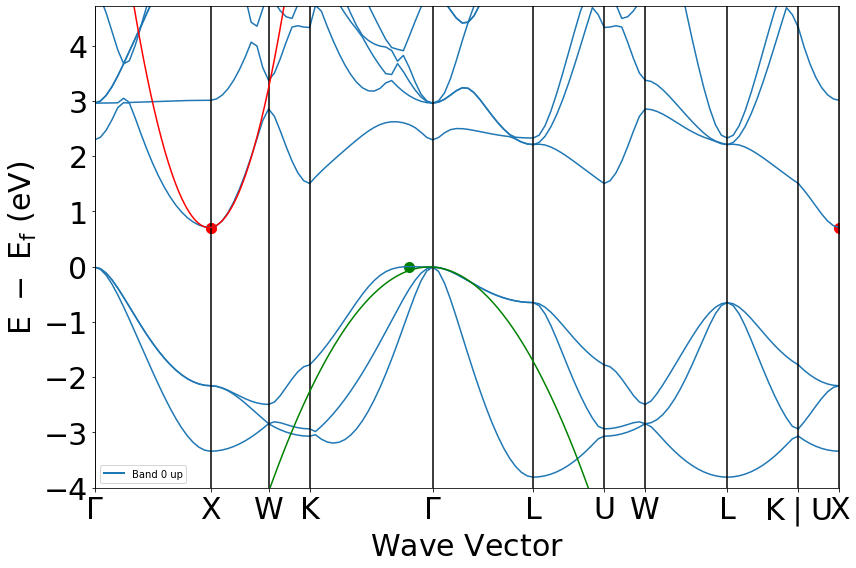

In [119]:
x_conduction = [data.get('distances')[0][-2], data.get('distances')[1][0], data.get('distances')[1][2]]
y_conduction = [energie.get('1')[0][7][-2], energie.get('1')[1][7][0], energie.get('1')[1][7][2]]


abc_c = np.polyfit(x_conduction, y_conduction, 2)

def f_c(k):
    return abc_c[0]*k*k + abc_c[1]*k + abc_c[2]

x_plot_c = np.arange(0, 2, 0.01)
y_plot_c = f_c(x_plot_c)


bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(x_plot_v, y_plot_v, color='green')
plt.plot(x_plot_c, y_plot_c, color='red')
plt.show()